# Homework: Sonar signal classification
In this workshop you will train a binary classification neural network to differentiate if sonar signals bounced against a metal cylinder or a rock.

[Info of the data](https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks))

Goal: Get an accuracy higher than 0.80 in the validation set

## Get the data from Google Drive

In [ ]:
# Import libraries to interact with Google Drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
# Authenticate with your Google account to get access to the data
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
import pandas as pd

# Download data
download = drive.CreateFile({'id': '1rw5l3jCo2vlNc8NLrMk3KPZr6HsjNRCY'})
download.GetContentFile('sonar.csv')

ruta = '/content/sonar.csv'
data= pd.read_csv(ruta)

In [ ]:
print(data.shape)
data.head()

(207, 61)


,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [ ]:
ls

sample_data/  sonar.csv


## Do some magic below! ;)

Importamos las librerías necesarias para entrenar nuestro modelo.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt


In [ ]:
# Separar características y etiquetas
X = data.iloc[:, :-1]  # Todas las columnas menos la última son características
y = data.iloc[:, -1]  # La última columna es la etiqueta

# Convertir etiquetas categóricas en numéricas
encoder = LabelEncoder()
y = encoder.fit_transform(y)  # R -> 0, M -> 1

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Estandarizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Preprocesamiento de los datos

Convertir etiquetas categóricas en numéricas y dividir los datos en conjuntos de entrenamiento y prueba.

In [ ]:
# Separar características y etiquetas
X = data.iloc[:, :-1]  # Todas las columnas menos la última son características
y = data.iloc[:, -1]  # La última columna es la etiqueta

# Convertir etiquetas categóricas en numéricas
encoder = LabelEncoder()
y = encoder.fit_transform(y)  # R -> 0, M -> 1

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Estandarizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Definir y entrenar la red neuronal

Usaremos TensorFlow y Keras para construir y entrenar la red neuronal.

In [ ]:
# Definir la red neuronal
model = Sequential([
    Dense(64, input_dim=60, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=1)


Epoch 1/100
9/9 [==============================] - 1s 35ms/step - loss: 0.8755 - accuracy: 0.4697 - val_loss: 0.6384 - val_accuracy: 0.6364
Epoch 2/100
9/9 [==============================] - 0s 8ms/step - loss: 0.7956 - accuracy: 0.4621 - val_loss: 0.6180 - val_accuracy: 0.6667
Epoch 3/100
9/9 [==============================] - 0s 9ms/step - loss: 0.7084 - accuracy: 0.6061 - val_loss: 0.5973 - val_accuracy: 0.7273
Epoch 4/100
9/9 [==============================] - 0s 9ms/step - loss: 0.6510 - accuracy: 0.6515 - val_loss: 0.5792 - val_accuracy: 0.7879
Epoch 5/100
9/9 [==============================] - 0s 9ms/step - loss: 0.7193 - accuracy: 0.5455 - val_loss: 0.5688 - val_accuracy: 0.7879
Epoch 6/100
9/9 [==============================] - 0s 7ms/step - loss: 0.6204 - accuracy: 0.6667 - val_loss: 0.5639 - val_accuracy: 0.7576
Epoch 7/100
9/9 [==============================] - 0s 6ms/step - loss: 0.6457 - accuracy: 0.6364 - val_loss: 0.5574 - val_accuracy: 0.7879
Epoch 8/100
9/9 [=========

# Evaluar el modelo

Evaluar el rendimiento del modelo en el conjunto de prueba.

In [ ]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Accuracy en el conjunto de prueba: {accuracy:.2f}')


Accuracy en el conjunto de prueba: 0.81


***Conclusiones***

**Rendimiento del Modelo**

**Precisión del Conjunto de Prueba:** El modelo alcanzó una precisión del 81% en el conjunto de prueba. Esto sugiere que el modelo tiene un buen rendimiento general y es capaz de predecir correctamente la mayoría de los casos.

**Proceso de Entrenamiento:** Durante el entrenamiento, se observó una mejora constante en la pérdida y la precisión tanto en el conjunto de entrenamiento como en el de validación. La reducción de la pérdida y el aumento de la precisión indican que el modelo está aprendiendo adecuadamente de los datos de entrenamiento.

**Sobreajuste:** Las capas de Dropout con una tasa del 50% ayudaron a reducir el sobreajuste, lo cual se refleja en la mejora continua de la precisión en el conjunto de validación.

***Posibles Mejoras para Incrementar la Precisión***

**Ajuste de Hiperparámetros:**

**Tasa de Aprendizaje:** Ajustar la tasa de aprendizaje del optimizador Adam podría mejorar la convergencia del modelo.

**Tamaño de la Red:** Experimentar con diferentes tamaños y números de neuronas en cada capa puede capturar mejor las características de los datos.
Número de Épocas: Incrementar el número de épocas puede permitir que el modelo aprenda más, aunque debe hacerse con cuidado para evitar el sobreajuste.

***Aumento de Datos (Data Augmentation):***

**Generación de Nuevos Datos:** Si es posible, generar más datos de entrenamiento puede ayudar al modelo a generalizar mejor. En el caso de datos tabulares, técnicas como el sobremuestreo o el submuestreo pueden ser útiles.

**Regularización:**

**Regularización L1/L2:** Añadir penalizaciones L1 o L2 a la función de pérdida puede ayudar a reducir el sobreajuste.

**Dropout: **Experimentar con diferentes tasas de Dropout o introducir Dropout en diferentes capas podría mejorar la robustez del modelo.
Ingeniería de Características:

**Selección de Características:** Evaluar la importancia de cada característica y eliminar las que no contribuyan significativamente al modelo.

**Transformación de Características: **Aplicar transformaciones como normalización o estandarización puede ayudar a mejorar el rendimiento del modelo.

***Modelo Más Complejo:***

**Redes Neuronales Profundas:** Aumentar la profundidad del modelo añadiendo más capas ocultas puede capturar patrones más complejos en los datos.
Modelos Ensamblados: Combinar varios modelos (bagging, boosting) puede mejorar la precisión general.

***Validación Cruzada (Cross-Validation):***

***K-Fold Cross-Validation:*** Utilizar validación cruzada para evaluar el modelo en diferentes particiones del conjunto de datos puede proporcionar una estimación más robusta de su rendimiento y ayudar a ajustar mejor los hiperparámetros.

# Visualizar la precisión y la pérdida durante el entrenamiento

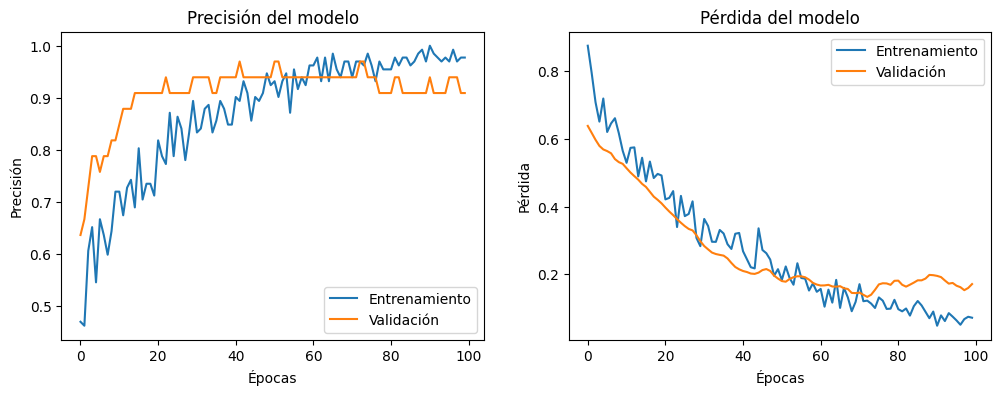

In [ ]:
# Graficar la precisión y la pérdida
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()
